## Day 20

https://adventofcode.com/2021/day/20

In [192]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

def readInput20(filename):
    with open(filename) as f:
        p = f.read().split("\n\n")
        alg = [ 1 if s=="#" else 0 for s in p[0] ]
        grid = p[1].strip('\n').split('\n')
        img = np.zeros((len(grid),len(grid[0])),dtype=int)
        for y in range(len(grid)):
            for x in range(len(grid[0])):
                if grid[y][x]=='#':
                    img[y,x] = 1
                else:
                    img[y,x] = 0
        return alg, img

In [347]:
def pixels(X):
    x,y = X
    pix = []
    for dy in (-1,0,1):
        for dx in (-1,0,1):
            pix.append((x+dx,y+dy))
    return pix

def imgPadding(img,padding=3,pad=0):
    # input algorithm changes the (infini te) space around image to all light or all dark depending on iteration
    if pad==0:
        img_pad = np.zeros((img.shape[0]+2*padding,img.shape[1]+2*padding),dtype=int)
    else:
        img_pad = np.ones((img.shape[0]+2*padding,img.shape[1]+2*padding),dtype=int)
    img_pad[padding:-padding,padding:-padding] = img
    return img_pad

def evolve(img,alg,nstep=2,padding=3,border=1,padMode=0,verbose=False):
    for n in range(nstep):
        if verbose:
            print(n+1,end=" ")
        if padMode==0: # example
            pad=0
        else: # full input: change border padding depending on iteration
            pad=n%2
        img = imgPadding(img,padding,pad)
        for _ in range(nstep):
            imgnew = np.zeros((img.shape[0],img.shape[1]),dtype=int)
            for y in range(1,len(img)-1):
                for x in range(1,len(img[0])-1):
                    s = "".join([ str(img[yp,xp]) for xp,yp in pixels((x,y)) ])
                    d = int(s,2)
                    imgnew[y,x] = alg[d]
        if border<padding:
            img = imgnew[padding-border:-padding+border,padding-border:-padding+border]
        else:
            img = imgnew
    if verbose: print("")
    return img

Test 1: 35


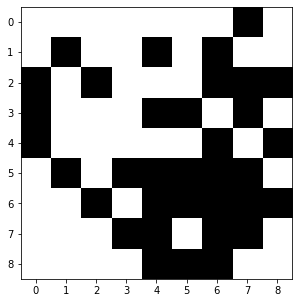

In [348]:
alg0,img0 = readInput20("data/day20test1.txt")
img0 = evolve(img0,alg0,2,padMode=0,padding=3,border=1,verbose=False)
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.imshow(img0,cmap="binary")
print("Test 1:",sum(img0[img0==1]))

Part 1: 5819


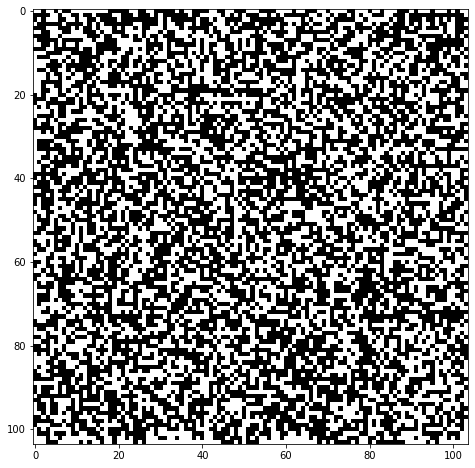

In [349]:
alg,img = readInput20("data/input20.txt")
img = evolve(img,alg,2,padMode=1,padding=3,border=1,verbose=False)
fig, ax = plt.subplots(1,1,figsize=(8,8))
plt.imshow(img,cmap="binary")
print("Part 1:",sum(img[img==1]))

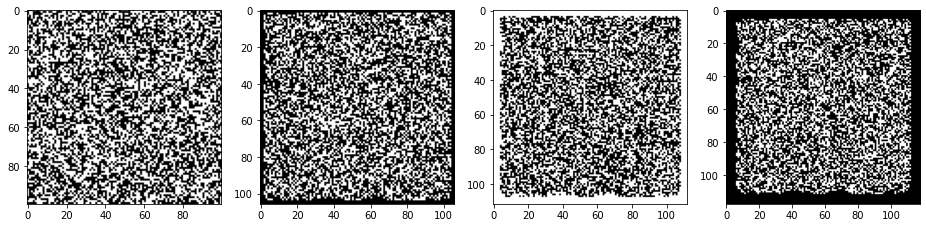

In [340]:
alg,img = readInput20("data/input20.txt")

img1 = evolve(img,alg,1,padMode=1,padding=6,border=3,verbose=False)
img2 = evolve(img,alg,2,padMode=1,padding=6,border=3,verbose=False)
img3 = evolve(img,alg,3,padMode=1,padding=6,border=3,verbose=False)

fig, ax = plt.subplots(1,4,figsize=(16,4))
ax[0].imshow(img ,cmap="binary")
ax[1].imshow(img1,cmap="binary")
ax[2].imshow(img2,cmap="binary")
ax[3].imshow(img3,cmap="binary")

In [353]:
alg0,img0 = readInput20("data/day20test1.txt")
img050 = evolve(img0,alg0,50,padMode=0,verbose=True)
print("Test 2:",sum(img050[img050==1]))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
Test 2: 3351


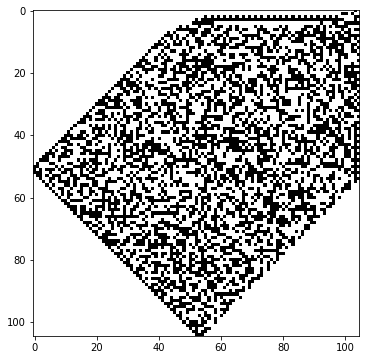

In [354]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.imshow(img050,cmap='binary')

In [355]:
alg,img = readInput20("data/input20.txt")
img50 = evolve(img,alg,50,padMode=1,verbose=True)
print("Part 2:",sum(img50[img50==1]))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
Part 2: 18516


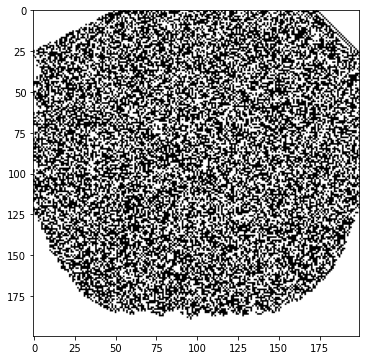

In [357]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.imshow(img50,cmap='binary')